In [3]:
import numpy as np
from scipy.io import loadmat
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## MNIST Dataset

In [4]:
mnist = loadmat('mnist-original.mat')
mnist_X = np.transpose(mnist['data'])
mnist_y = np.transpose(mnist['label'])
mnist_train_X, mnist_test_X, mnist_train_y, mnist_test_y = train_test_split(mnist_X, mnist_y, stratify=mnist_y)

### PCA

In [3]:
pca = PCA(n_components=2)
pca.fit(mnist_train_X)
transformed_mnist_train_X = pca.transform(mnist_train_X)
transformed_mnist_test_X = pca.transform(mnist_test_X)

In [5]:
# pca = PCA(n_components=2)
# pca.fit(mnist_X[:100])
# pca.transform(mnist_X[:100])

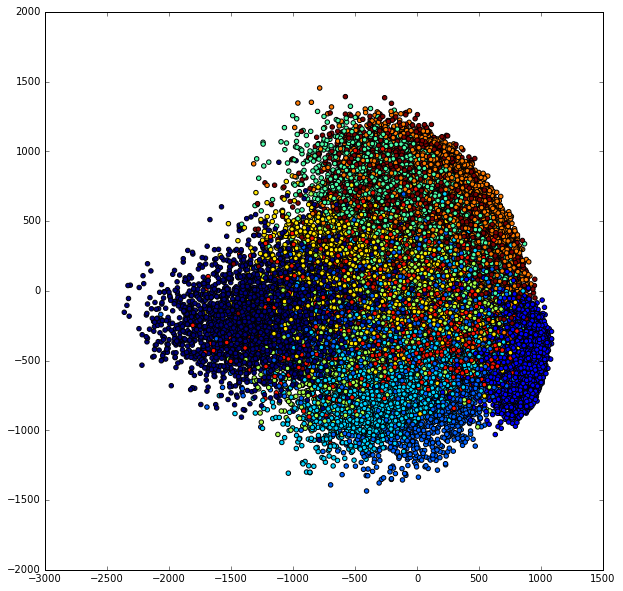

In [46]:
plt.figure(figsize=(10, 10))
plt.scatter(transformed_mnist_train_X[:, 0], transformed_mnist_train_X[:, 1], c=mnist_train_y)

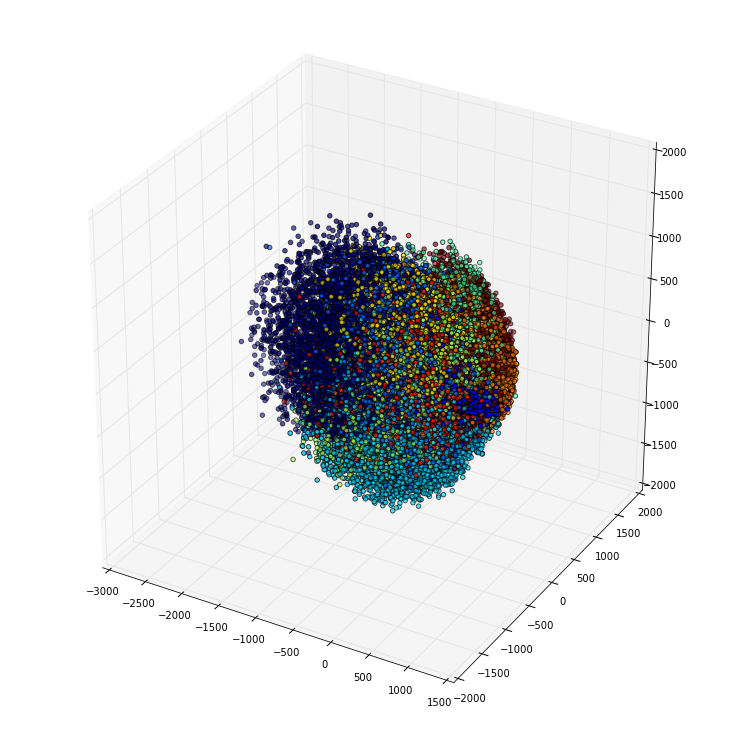

In [52]:
pca = PCA(n_components=3)
pca.fit(mnist_train_X)
transformed_mnist_train_X = pca.transform(mnist_train_X)
transformed_mnist_test_X = pca.transform(mnist_test_X)

fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
ax.scatter(transformed_mnist_train_X[:, 0], transformed_mnist_train_X[:, 1], transformed_mnist_train_X[:, 2], c=mnist_train_y)
plt.show()

### T-SNE

### 3 PCA && 2 T-SNE

In [8]:
%%time
pca = PCA(n_components=3)
pca.fit(mnist_train_X)
transformed_mnist_train_X = pca.transform(mnist_train_X)
transformed_mnist_test_X = pca.transform(mnist_test_X)

CPU times: user 5.73 s, sys: 969 ms, total: 6.7 s
Wall time: 5.08 s


In [10]:
%%time
tsne = TSNE(n_components=2)
#transformed_mnist_train_X = tsne.fit_transform(transformed_mnist_train_X)
transformed_mnist_test_X = tsne.fit_transform(transformed_mnist_test_X)

CPU times: user 8min 18s, sys: 46.8 s, total: 9min 5s
Wall time: 9min 29s


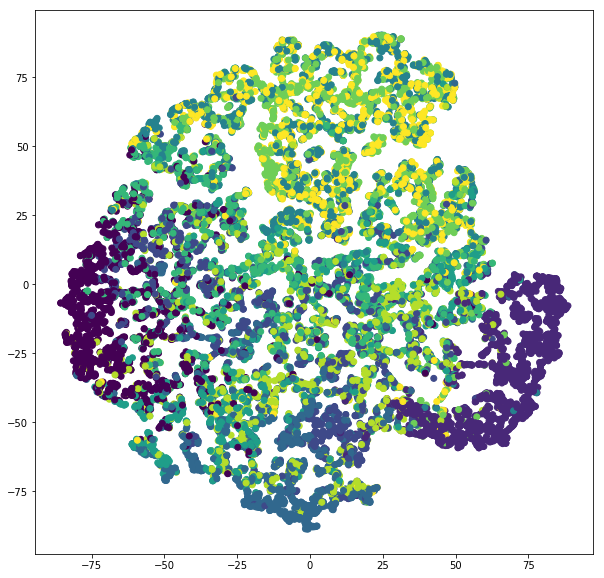

In [13]:
plt.figure(figsize=(10, 10))
plt.scatter(transformed_mnist_test_X[:, 0], transformed_mnist_test_X[:, 1],
            c=mnist_test_y.reshape(-1))

### 5 PCA && 2 T-SNE

In [5]:
%%time
pca = PCA(n_components=5)
pca.fit(mnist_train_X)
transformed_mnist_train_X = pca.transform(mnist_train_X)
transformed_mnist_test_X = pca.transform(mnist_test_X)

CPU times: user 13.7 s, sys: 1.1 s, total: 14.8 s
Wall time: 4.89 s


In [6]:
%%time
tsne = TSNE(n_components=2)
#transformed_mnist_train_X = tsne.fit_transform(transformed_mnist_train_X)
transformed_mnist_test_X = tsne.fit_transform(transformed_mnist_test_X)

CPU times: user 9min 37s, sys: 3min 27s, total: 13min 4s
Wall time: 10min 14s


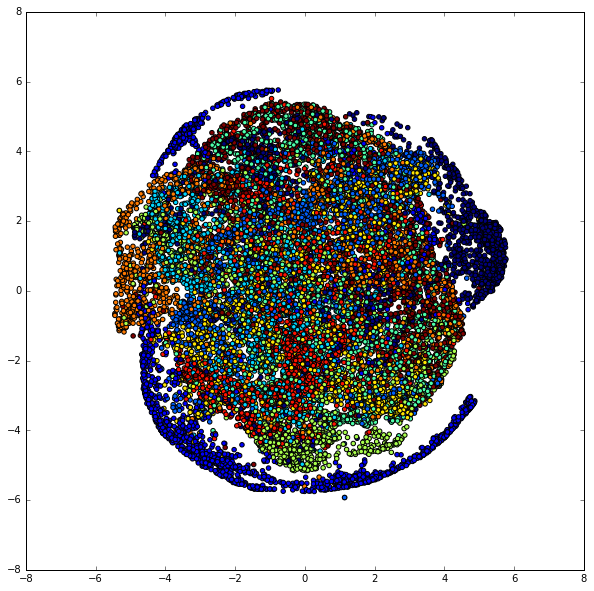

In [7]:
plt.figure(figsize=(10, 10))
plt.scatter(transformed_mnist_test_X[:, 0], transformed_mnist_test_X[:, 1],
            c=mnist_test_y.reshape(-1))

### No of components : 5

In [4]:
pca = PCA(n_components=5)
pca.fit(mnist_train_X)

PCA(copy=True, n_components=5, whiten=False)

In [6]:
transformed_mnist_train_X = pca.transform(mnist_train_X)
transformed_mnist_test_X = pca.transform(mnist_test_X)

In [16]:
%%time
clf = LogisticRegression(penalty='l2', n_jobs=-1, solver='liblinear')
clf.fit(transformed_mnist_train_X, mnist_train_y.ravel())

CPU times: user 4.2 s, sys: 0 ns, total: 4.2 s
Wall time: 4.2 s


In [17]:
print("Train accuracy score: ", clf.score(transformed_mnist_train_X, mnist_train_y))
print("Test accuracy score: ", clf.score(transformed_mnist_test_X, mnist_test_y))

Train accuracy score:  0.646971428571
Test accuracy score:  0.645714285714


### No of components : 20

In [18]:
pca = PCA(n_components=20)
pca.fit(mnist_train_X)

PCA(copy=True, n_components=20, whiten=False)

In [19]:
transformed_mnist_train_X = pca.transform(mnist_train_X)
transformed_mnist_test_X = pca.transform(mnist_test_X)

In [21]:
%%time
clf = LogisticRegression(penalty='l2', n_jobs=-1, solver='liblinear')
clf.fit(transformed_mnist_train_X, mnist_train_y.ravel())

CPU times: user 40.1 s, sys: 3.97 ms, total: 40.1 s
Wall time: 40.1 s


In [22]:
print("Train accuracy score: ", clf.score(transformed_mnist_train_X, mnist_train_y))
print("Test accuracy score: ", clf.score(transformed_mnist_test_X, mnist_test_y))

Train accuracy score:  0.862514285714
Test accuracy score:  0.860514285714


### No of Components: 50

In [27]:
pca = PCA(n_components=50)
pca.fit(mnist_train_X)
transformed_mnist_train_X = pca.transform(mnist_train_X)
transformed_mnist_test_X = pca.transform(mnist_test_X)

In [28]:
%%time
clf = LogisticRegression(penalty='l2', n_jobs=-1, solver='liblinear')
clf.fit(transformed_mnist_train_X, mnist_train_y.ravel())

CPU times: user 3min 33s, sys: 27.9 ms, total: 3min 33s
Wall time: 3min 32s


In [29]:
print("Train accuracy score: ", clf.score(transformed_mnist_train_X, mnist_train_y))
print("Test accuracy score: ", clf.score(transformed_mnist_test_X, mnist_test_y))

Train accuracy score:  0.898514285714
Test accuracy score:  0.898114285714


### No of Components : 80

In [30]:
pca = PCA(n_components=80)
pca.fit(mnist_train_X)
transformed_mnist_train_X = pca.transform(mnist_train_X)
transformed_mnist_test_X = pca.transform(mnist_test_X)

In [31]:
%%time
clf = LogisticRegression(penalty='l2', n_jobs=-1, solver='liblinear')
clf.fit(transformed_mnist_train_X, mnist_train_y.ravel())

CPU times: user 7min 18s, sys: 28.2 ms, total: 7min 18s
Wall time: 7min 17s


In [32]:
print("Train accuracy score: ", clf.score(transformed_mnist_train_X, mnist_train_y))
print("Test accuracy score: ", clf.score(transformed_mnist_test_X, mnist_test_y))

Train accuracy score:  0.909942857143
Test accuracy score:  0.906285714286


## Spam Dataset

In [35]:
data = pd.read_csv('spambase/spambase.data', dtype='float', names=[i for i in range(56)])
data = data.values
spam_data_X = data[:, :54]
spam_data_y = data[:, 55]
spam_train_X, spam_test_X, spam_train_y, spam_test_y = train_test_split(spam_data_X, spam_data_y)

### Logistic Regression

In [38]:
components = [5, 10, 15, 20, 25]
for cmp in components:
    pca = PCA(n_components=cmp)
    pca.fit(spam_train_X)
    transformed_spam_train_X = pca.transform(spam_train_X)
    transformed_spam_test_X = pca.transform(spam_test_X)
    spam_clf = LogisticRegression(penalty='l2', n_jobs=-1, solver='liblinear')
    spam_clf.fit(transformed_spam_train_X, spam_train_y.ravel())
    print("No of components: ", cmp,
        "Train accuracy score: ", spam_clf.score(transformed_spam_train_X, spam_train_y),
         "Test accuracy score: ", spam_clf.score(transformed_spam_test_X, spam_test_y))

No of components:  5 Train accuracy score:  0.854492753623 Test accuracy score:  0.84448305821
No of components:  10 Train accuracy score:  0.891884057971 Test accuracy score:  0.892267593397
No of components:  15 Train accuracy score:  0.906666666667 Test accuracy score:  0.904430929626
No of components:  20 Train accuracy score:  0.907826086957 Test accuracy score:  0.903562119896
No of components:  25 Train accuracy score:  0.916811594203 Test accuracy score:  0.920938314509


### Decision Tree

In [39]:
components = [5, 10, 15, 20, 25]
for cmp in components:
    pca = PCA(n_components=cmp)
    pca.fit(spam_train_X)
    transformed_spam_train_X = pca.transform(spam_train_X)
    transformed_spam_test_X = pca.transform(spam_test_X)
    spam_tree = DecisionTreeClassifier()
    spam_tree.fit(transformed_spam_train_X, spam_train_y)
    print("No of components: ", cmp,
        "Train accuracy score: ", spam_tree.score(transformed_spam_train_X, spam_train_y),
         "Test accuracy score: ", spam_tree.score(transformed_spam_test_X, spam_test_y))

No of components:  5 Train accuracy score:  0.999710144928 Test accuracy score:  0.874022589053
No of components:  10 Train accuracy score:  0.999710144928 Test accuracy score:  0.887923544744
No of components:  15 Train accuracy score:  0.999710144928 Test accuracy score:  0.885317115552
No of components:  20 Train accuracy score:  0.999710144928 Test accuracy score:  0.891398783666
No of components:  25 Train accuracy score:  0.999710144928 Test accuracy score:  0.876629018245
